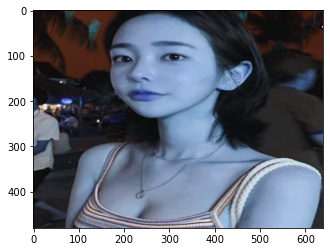

In [6]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

image_path = os.getenv('HOME') + '/Desktop/Data/images/image.png'  # 이미지 경로 저장
img_bgr = cv2.imread(image_path)  # 이미지 읽기
img_bgr = cv2.resize(img_bgr, (640, 480))  # 이미지 크기조정

img_show = img_bgr.copy()  # 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

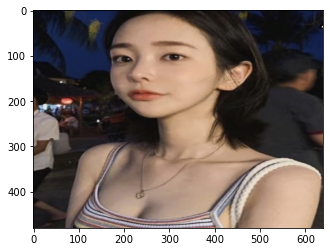

In [7]:
# RGB로 바꾸기
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [8]:
detector_hog = dlib.get_frontal_face_detector()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)  # (image, num of img pyramid)

print(dlib_rects)  # 찾은 얼굴 영역 좌표

rectangles[[(142, 19) (365, 242)]]


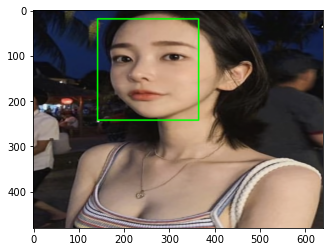

In [9]:
# 얼굴 영역 표시
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [11]:
# 모델 불러오기
model_path = os.getenv('HOME') + '/Desktop/Data/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)  # landmark 예측

# landmarks point
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)  # landmark 예측
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
print(len(list_landmarks[0]))

68


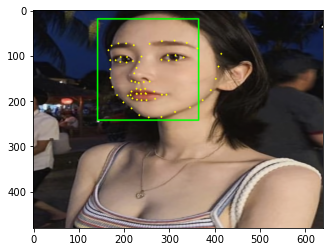

In [12]:
# 점 찍기
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
        
img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [13]:
# 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print(landmark[30])
    x = landmark[30][0]  # 스티커 위치 (턱2, 코30, 눈36, 입48)
    y = landmark[48][1] - dlib_rect.width()//2
    w = dlib_rect.width()  # 스티커 크기 (width = height)
    h = dlib_rect.width()
    print('(x,y) : (%d,%d)'%(x,y))
    print('(w,h) : (%d,%d)'%(w,h))

(223, 139)
(x,y) : (223,76)
(w,h) : (224,224)


In [17]:
# 스티커 이미지 w,h 크기로 적용
sticker_path = os.getenv('HOME')+'/Desktop/Data/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(224, 224, 3)


In [18]:
# 이미지 추가를 위한 x, y 좌표 조정
refined_x = x - landmark[2][0]//2  # left
refined_y = y - landmark[36][1]//4 # top
print('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (138,49)


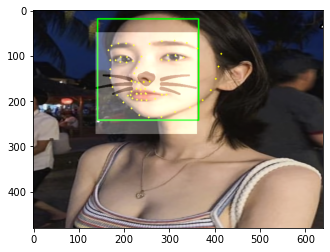

In [21]:
# 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
dst = cv2.addWeighted(sticker_area, 1, img_sticker, 0.2, 0)
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = dst

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

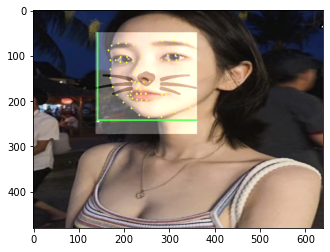

In [22]:
# 박스, 점 제거
sticker_area2 = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
dst2 = cv2.addWeighted(sticker_area2, 1, img_sticker, 0.2, 0)
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = dst

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

# area 안의 박스와 점이 제거가 안된다. 나중에 다시 해보자...